In [1]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

In [2]:
allath_df = pd.read_csv("kaggle_allathlete_olympics.csv")
allath_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
summer_df = allath_df.loc[allath_df["Season"]=="Summer"]
exclude_2016 = summer_df.loc[summer_df["Year"] < 2015]
exclude_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [4]:
#atheletes of each sex who participated per year 
year_list = exclude_2016["Year"].unique()
year_list

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928, 1976,
       1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [5]:
men_list = []
men_wins = []
female_list = []
female_wins = []



for year in year_list:
    year_df = exclude_2016.loc[exclude_2016["Year"]==year]
    
    #male participation
    men_df = year_df.loc[year_df["Sex"]=="M"]
    total_men = men_df["Name"].count()
    men_list.append(total_men)
    
    #male wins
    win_men_df = men_df.loc[men_df["Medal"] != "Nan"]
    win_men = win_men_df["Medal"].count()
    men_wins.append(win_men)

    
    #female participation
    female_df = year_df.loc[year_df["Sex"]=="F"]
    total_female = female_df["Name"].count()
    female_list.append(total_female)
    
    #female wins
    win_female_df = female_df.loc[female_df["Medal"] != "Nan"]
    win_female = win_female_df["Medal"].count()
    female_wins.append(win_female)
                         

sex_particp_data = {"Year" : year_list,
                   "Number of Men" : men_list,
                    "Number of Men WINS" : men_wins,
                   "Number of Women" : female_list,
                   "Number of Women WINS" : female_wins}

sex_partcip_df = pd.DataFrame(sex_particp_data)
sex_partcip_df.head()

,Year,Number of Men,Number of Men WINS,Number of Women,Number of Women WINS
0,1992,8853,1120,4124,592
1,2012,7105,1023,5815,918
2,1920,4158,1264,134,44
3,1900,1903,591,33,13
4,1932,2622,585,347,62


In [10]:
#calculate win rate per sex per year
men_win_rate = sex_partcip_df["Number of Men WINS"]/sex_partcip_df["Number of Men"]*100
women_win_rate = sex_partcip_df["Number of Women WINS"]/sex_partcip_df["Number of Women"]*100

#add columns to existing dataframe
sex_partcip_df["Men Win Rate (%)"]= men_win_rate
sex_partcip_df["Women Win Rate (%)"] = women_win_rate
sex_partcip_df.head()

,Year,Number of Men,Number of Men WINS,Number of Women,Number of Women WINS,Men Win Rate (%),Women Win Rate (%)
0,1992,8853,1120,4124,592,12.651079,14.354995
1,2012,7105,1023,5815,918,14.398311,15.786758
2,1920,4158,1264,134,44,30.399230,32.835821
3,1900,1903,591,33,13,31.056227,39.393939
4,1932,2622,585,347,62,22.311213,17.867435


Text(0.5,0,'Year')

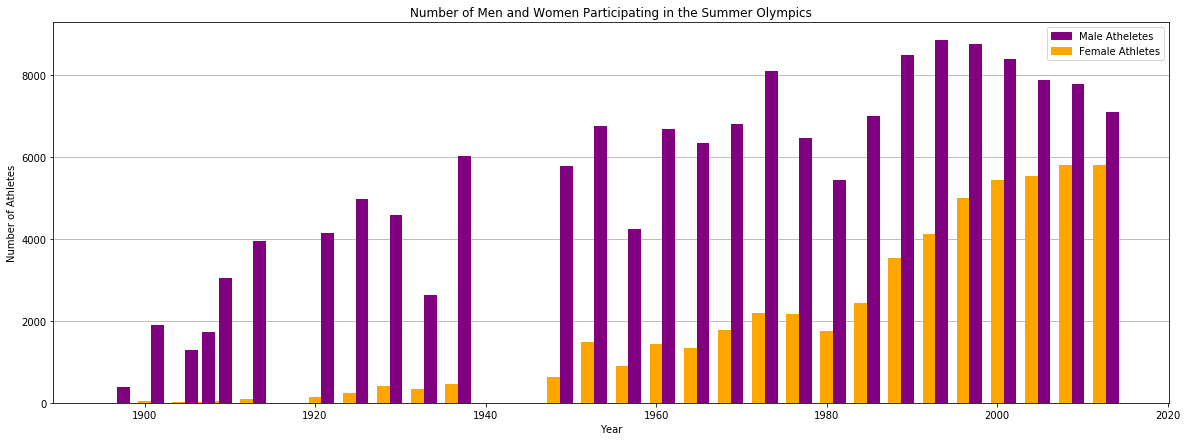

In [31]:
#participation graphs
x_year = sex_partcip_df["Year"]
y1_men = sex_partcip_df["Number of Men"]
y2_women = sex_partcip_df["Number of Women"]


#plot graph
plt.figure(figsize=(20, 7))
bar_width = 1.5
plt.grid(axis='y')
plt.bar(x_year, y2_women, width=bar_width, color="orange", zorder=2)
plt.bar(x_year + bar_width, y1_men, width=bar_width, color="purple", zorder=2 )

#create legend
purple_patch = mpatches.Patch(color="purple", label = "Male Atheletes")
orange_patch = mpatches.Patch(color="orange", label = "Female Athletes")
plt.legend(handles=[purple_patch, orange_patch])
plt.title ("Number of Men and Women Participating in the Summer Olympics")
plt.ylabel("Number of Athletes")
plt.xlabel("Year")

In [38]:
sex_partcip_df

,Year,Number of Men,Number of Men WINS,Number of Women,Number of Women WINS,Men Win Rate (%),Women Win Rate (%)
0,1992,8853,1120,4124,592,12.651079,14.354995
1,2012,7105,1023,5815,918,14.398311,15.786758
2,1920,4158,1264,134,44,30.399230,32.835821
3,1900,1903,591,33,13,31.056227,39.393939
4,1932,2622,585,347,62,22.311213,17.867435
5,1952,6773,757,1497,140,11.176731,9.352037
6,2000,8390,1124,5431,880,13.396901,16.203277
7,1996,8772,1078,5008,764,12.289102,15.255591
8,1912,3953,911,87,30,23.045788,34.482759
9,1924,4989,786,244,46,15.754660,18.852459


Text(0.5,0,'Year')

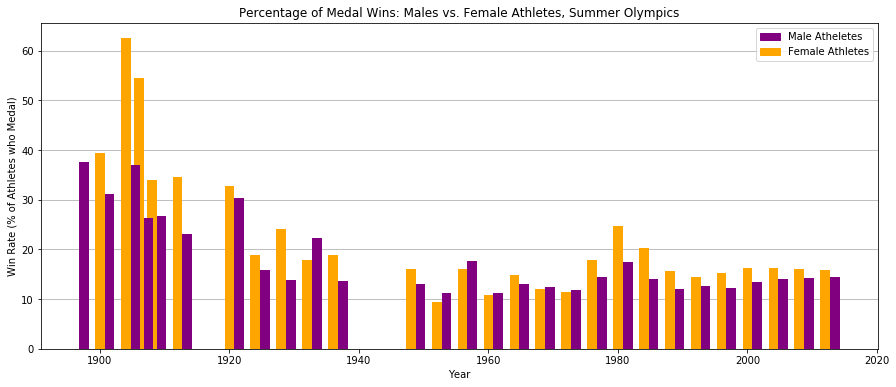

In [49]:
#win rate by sex graphs
x_year = sex_partcip_df["Year"]
y1_men = sex_partcip_df["Men Win Rate (%)"]
y2_women = sex_partcip_df["Women Win Rate (%)"]


#plot graph
plt.figure(figsize=(15, 6))
bar_width = 1.5
plt.grid(axis='y')
plt.bar(x_year, y2_women, width=bar_width, color="orange", zorder=2)
plt.bar(x_year + bar_width, y1_men, width=bar_width, color="purple", zorder=2 )


#create legend
purple_patch = mpatches.Patch(color="purple", label = "Male Atheletes")
orange_patch = mpatches.Patch(color="orange", label = "Female Athletes")
plt.legend(handles=[purple_patch, orange_patch])
plt.title ("Percentage of Medal Wins: Males vs. Female Athletes, Summer Olympics")
plt.ylabel("Win Rate (% of Athletes who Medal)")
plt.xlabel("Year")